# ASSIGNMENT CHAPTER 3 - DATA PREPROCESSING

## Dataset
- Sales/Marketing: https://www.kaggle.com/competitions/home-data-for-ml-course/data
- Health Case Study: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Assignment Outcomes
- Participants are able to do data preparation before doing next processes
- Participants are able to perform feature engineering and able to create features that would be useful in the modeling process
- Participants are able to perform EDA and are able to create features that would be useful in the modeling process
- Participants are able to perform reproducible research with python, R, or etc
- Participants are able to communicate through storytelling the findings they find in their models and previous data exploration process

## Question
1. Data Preparation
Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:
- Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
- Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
- Outlier: Memeriksa outlier dan menangani outlier jika ada.
- Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
- Feature encoding: Melakukan feature encoding jika diperlukan.

2. Exploratory Data Analysis (EDA)
Menggunakan dataset yang sama, Peserta diminta untuk:
- Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
- Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
- Menemukan dan mendeskripsikan statistical five summaries
- Mendeskripsikan distribusi data
3. Feature Engineering
Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

## Assessment Requirement
1. Data Preparation
Peserta dapat mengidentifikasi masalah data jika ada, lalu mereka juga mampu menangani masalah tersebut, dan dapat menjelaskan metode yang dipilih untuk mengatasi masalah data.

2. Exploratory Data Analysis (EDA)
Peserta dapat menghasilkan insight dari deskriptif statistik dan memilih visualisasi yang benar.

3. Feature Engineering
- Peserta dapat menggunakan teknik dalam pembuatan fitur baru.
- Peserta dapat membuat fitur yang relevan dan signifikan dalam penyelesaian masalah atau pencapaian objective.
- Peserta dapat mengukur relevansi dan signifikansi fitur yang telah dibuat secara kuantitatif maupun kualitatif.
- Peserta dapat mengkomunikasikan pentingnya fitur yang dibuat dalam menyelesaikan permasalahan atau dalam pemenuhan pencapaian objective.

# PENYELESAIAN ASSIGNMENT

## Import Modules

Hal yang pertama yang harus dilakukan adalah meng-import beberapa module yang akan digunakan, di antaranya adalah:
- Pandas, untuk mengolah data
- Matplotlib dan Seaborn, untuk mengvisualisasikan data
- Numpy untuk operasi matematik
- LabelEncoder untuk proses encoding tipe data kategorik
- MinMaxScaler untuk proses scalling tipe data numerik

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

Selanjutnya adalah me-load dataset. Disini dataset yang digunakan adalah Housing Price Dataset (dapat diakses melalui link di atas). Namun agar proses ini dapat dilakukan juga oleh viewer dari colab ini (tidak terjadi error dalam me-load dataset), maka dataset akan di-load melalui GitHub.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rizzzmaooo05/my-portofolio/main/msib-startup-campus/dataset/housing-price/train.csv")
df_backup = df.copy(deep = True)

## Data Preparation
Selanjutnya adalah data preparation. Disini akan dicek apakah dataset yang digunakan mengandung beberapa hal seperti:
- Missing Values
- Duplicate Values
- Outlier
- Imbalance Data

Pertama-tama jalankan `df.head()`:

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dapat dilihat bahwa Housing Price Dataset memiliki 81 kolom (columns) yang terdiri dari 80 data features dan 1 data target, yaitu `SalePrice`.

Kolom `Id` tidak akan digunakan sebagai features, jadi di sini kolom tersebut akan dibuang atau drop.

In [4]:
df.drop(columns = 'Id', inplace = True)

Untuk mengcek kolom apa saja yang terdapat pada dataset tersebut, dapat dengan menjalankan `df.columns`

In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Di atas adalah ke delapan puluh kolom yang terdapat pada dataset.

Selanjutnya, untuk mengetahui tipe data untuk setiap kolom dengan rinci, dapat dilakukan dengan mengeksekusi `df.dtypes`

In [6]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Penjelasan mengenai masing-masing kolom berserta tipe data dari kolom tersebut dapat dilihat dengan cara <b><a href = "https://raw.githubusercontent.com/rizzzmaooo05/my-portofolio/main/msib-startup-campus/dataset/housing-price/data_description.txt">Mengklik Tulisan Bercetak Tebal Ini!!</a></b>.

### Deteksi dan Handling Missing Values

Tahap selanjutnya yang perlu dilakukan adalah melakukan deteksi atau pengecekkan dan peng-handle-an missing values terhadap dataset. Missing values perlu dihandle karena dapat berpengaruh terhadap performa model Machine Learning. Missing Values dapat dihandle dalam dua cara, yaitu dengan membuang kolom yang mengandung missing values (dropping) atau mengisi kolom kolom yang mengandung missing values dengan teknik tertentu (imputation).


Pertama-tama jalankan `df.info()`.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Dapat terlihat bahwa jumlah entri data dalam dataset tersebut adalah 1460, namun terdapat beberapa kolom yang jumlah entri data-nya kurang dari 1460. Ini menandakan adanya missing values pada beberapa kolom. Missing values ini akan dihandle di proses selanjutnya di bawah ini.

Ketika mengeksekusi `df.info()`, selain menampilkan informasi tentang missing values dalam setiap kolom pada dataset, juga menampilkan informasi tentang nama kolom (yang di atas telah diketahui apa saja kolom yang terdapat pada dataset dengan mengeksekusi `df.columns`) dan informasi mengenai tipe data masing-masing kolom (yang di atas juga telah diketahui tipe data masing-masing kolom yang terdapat pada dataset dengan mengeksekusi `df.dtypes`).

Missing values perlu dihandle karena dapat berpengaruh terhadap performa model Machine Learning. Missing Values dapat dihandle dalam dua cara, yaitu dengan membuang kolom yang mengandung missing values (dropping) atau mengisi kolom kolom yang mengandung missing values dengan teknik tertentu (imputation).

Terlihat bahwa terdapat kolom yang mengandung missing values. Seperti yang sempat disinggung di atas, cara meng-handle missing values ada dua, yaitu dropping dan imputation. Kedua cara tersebut digunakan untuk kondisi yang berbeda.

Agar suatu features dalam dataset dapat digunakan untuk Machine Learning, features tersebut haruslah memiliki nilai, tidak kosong. Dari informasi yang didapat dari mengeksekusi `df.info()` nampak bahwa beberapa features hanya sedikit mengandung missing values, features ini masih mungkin untuk digunakan dengan cara imputation. Namun, ada juga beberapa features yang mengandung missing values yang sangat ekstrem, features ini sebaiknya di-handle dengan dropping.

Misalnya di sini diterapkan syarat ambang batas agar suatu features dapat digunakan untuk proses selanjutnya, yaitu mengandung missing values kurang dari 20% dri keseluruhan data (sekitar 292 data). Features yang tidak memenuhi syarat ambang batas akan didrop. Untuk melakukan proses tersebut, dapat mengeksekusi perintah berikut ini.

In [8]:
for col in df.columns:
  if df[col].isna().sum() >= 0.2 * df.shape[0]:
    df.drop(columns = col, inplace = True)

Setelah dilakukan proses dropping features, features yang tersisa dapat dicek dengan mengeksekusi `df.shape[1]`.

In [9]:
df.shape[1]

75

Terlihat features yang tersisa yaitu 75. Selanjutnya features yang masih mengandung missing values akan di-impute.
- Untuk data numerik, terdapat beberapa teknik imputation, salah satunya adalah teknik interpolate. Kelebihan teknik ini adalah nilai yang dihasilkan tidak seragam dan bergantung pada data sebelum atau sesudahnya, sehingga distribusi data bisa lebih merata, tidak bertumpuk pada suatu nilai.
- Untuk data kategorik, akan di-impute dengan menggunakan modus (mode).

Untuk melakukannya dapat mengeksekusi perintah berikut ini.


In [10]:
df_num = df.select_dtypes(include = ['int64', 'float64']).drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond'])
df_cat = df.drop(columns = df_num.columns)

# imputation for categorical data
for col in df_cat.columns:
  df[col].fillna(df[col].mode()[0], inplace = True)

# imputation for numerical data
for col in df_num.columns:
  df[col].fillna(df[col].interpolate(), inplace = True)

Dengan ini, proses handling missing values telah selesai. Untuk mengcek apakah proses handling ini berhasil, jalankan kembali `df.info()`.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Terlihat bahwa seluruh features sudah tidak mengandung missing values yang menandakan bahwa proses handling terhadap missing values telah berhasil.

### Deteksi Duplicate Data

Selanjutnya yaitu memeriksa data duplicate dalam dataset. Untuk mengecek apakah terdapat data duplicate dalam dataset, dapat menjalankan `df.duplicated().value_counts()`

In [12]:
df.duplicated().value_counts()

False    1460
dtype: int64

Index `False` di atas mengindikasikan bahwa dalam dataset tidak terdapat duplicate data. Maka tidak diperlukan peng-handle-an terhadap data duplicate.

### Deteksi dan Handling Outlier

Hal yang tak kalah penting dan perlu diperhatikan adalah melakukan deteksi atau pengecekkan serta peng-handle-an terhadap outlier atau data pencilan. Outlier tersebut nantinya akan mempengaruhi performa model (dalam konteks Machine Learning) jika tidak dihandle.

Pengecekkan outlier hanya dilakukan untuk kolom yang bertipe data numerik. Maka dari itu, dataset akan dibagi menjadi dua, yaitu dataset yang menampung data dengan tipe data numerik dan dataset yang menampung nilai dengan tipe data kategorik. Ada sedikit catatan bahwa meskipun kolom `MSSubClass`, `OverallQual`, dan `OverallCond` bertipe data numerik, namun sebenarnya kolom-kolom tersebut bertipe data kategorik. Untuk memisahkan dataset tersebut, dapat dilakukan dengan mengekseksui perintah di bawah ini.

In [13]:
df_num = df.select_dtypes(include = ['int64', 'float64']).drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond'])
df_cat = df.drop(columns = df_num.columns)

Sekarang, dataset dengan tipe data kategorik dan numerik sudah dipisahkan. Dataset dengan tipe data kategorik ditampung dalam variable `df_cat` sedangkan dataset dengan tipe data numerik ditampung dalam variable `df_num`.

Untuk melakukan pengecekkan outlier dapat dilakukan dengan cara mem-plot dataset yang bertipe data numerik ke dalam boxplot. Nantinya untuk data-data outlier akan terlihat. Hal ini dapat dilakukan dengan mengeksekusi perintah berikut ini.

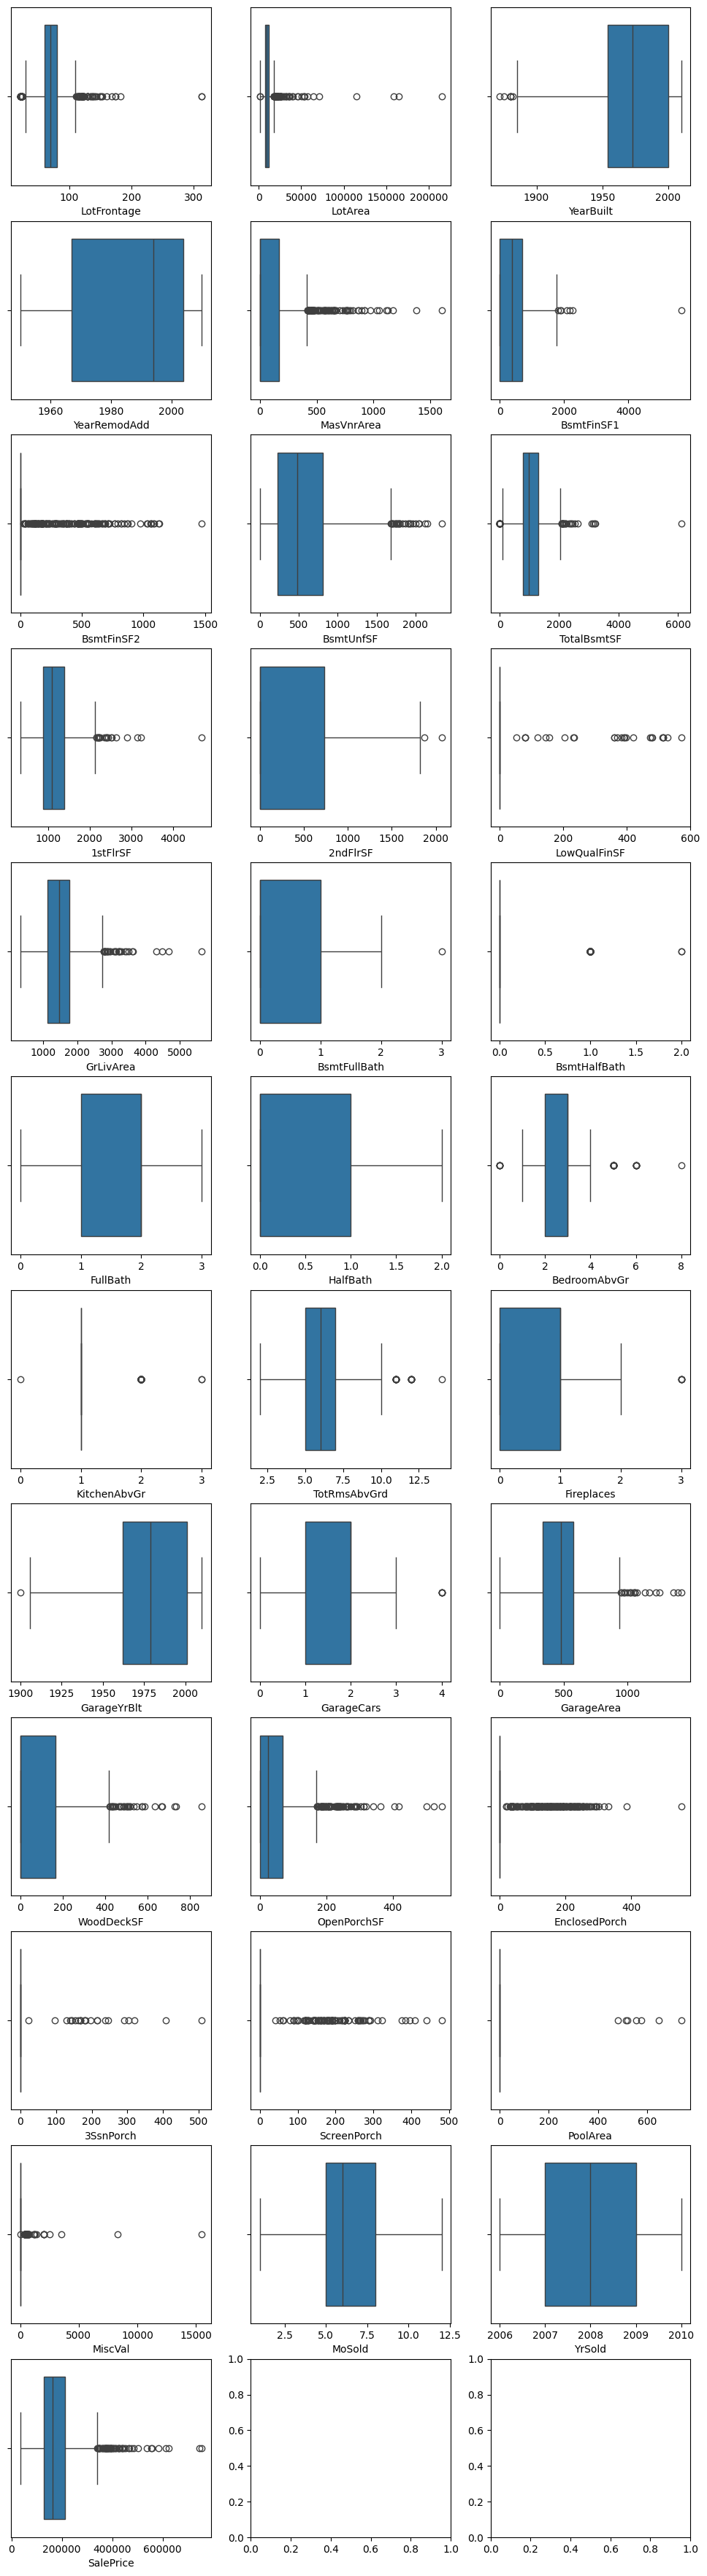

In [14]:
fig, axs = plt.subplots(12, 3, figsize = (12, 45))

for col, ax in zip(df_num.columns, axs.flatten()):
  sb.boxplot(data = df_num, x = col, ax = ax)

Terlihat bahwa di beberapa kolom, terdapat outlier. Data outlier akan dihandle dengan cara me-replace data outlier dengan data baru.

Outlier adalah data yang memiliki nilai kurang dari (Q1 - 1.5 IQR) yang merupakan batas bawah atau data yang memiliki nilai lebih dari (Q3 + 1.5 IQR) yang merupakan batas atas, dengan Q1 dan Q3 masing-masing adalah nilai kuartil pertama dan ketiga serta IQR adalah Inter Quartil Range (Q3 - Q1).

Nilai outlier yang kurang dari batas bawah akan di-replace dengan nilai batas bawah dan outlier yang lebih dari batas atas akan direplace dengan nilai batas atas. Untuk melakukannya bisa dengan mengeksekusi perintah di bawah ini.


In [15]:
for col in df_num.columns:
  q1    = np.quantile(df[col], q = 0.25)
  q3    = np.quantile(df[col], q = 0.75)
  iqr   = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  for i in range(len(df)):
    if df[col][i] < lower:
      df[col][i] = lower
    elif df[col][i] > upper:
      df[col][i] = upper

<ipython-input-15-96dc90f7e059>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper
<ipython-input-15-96dc90f7e059>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower


Setelah mengeksekusi perintah di atas, kemudian data di-plot kembali dengan boxplot untuk mengcek apakah proses replace data outlier berhasil atau tidak.

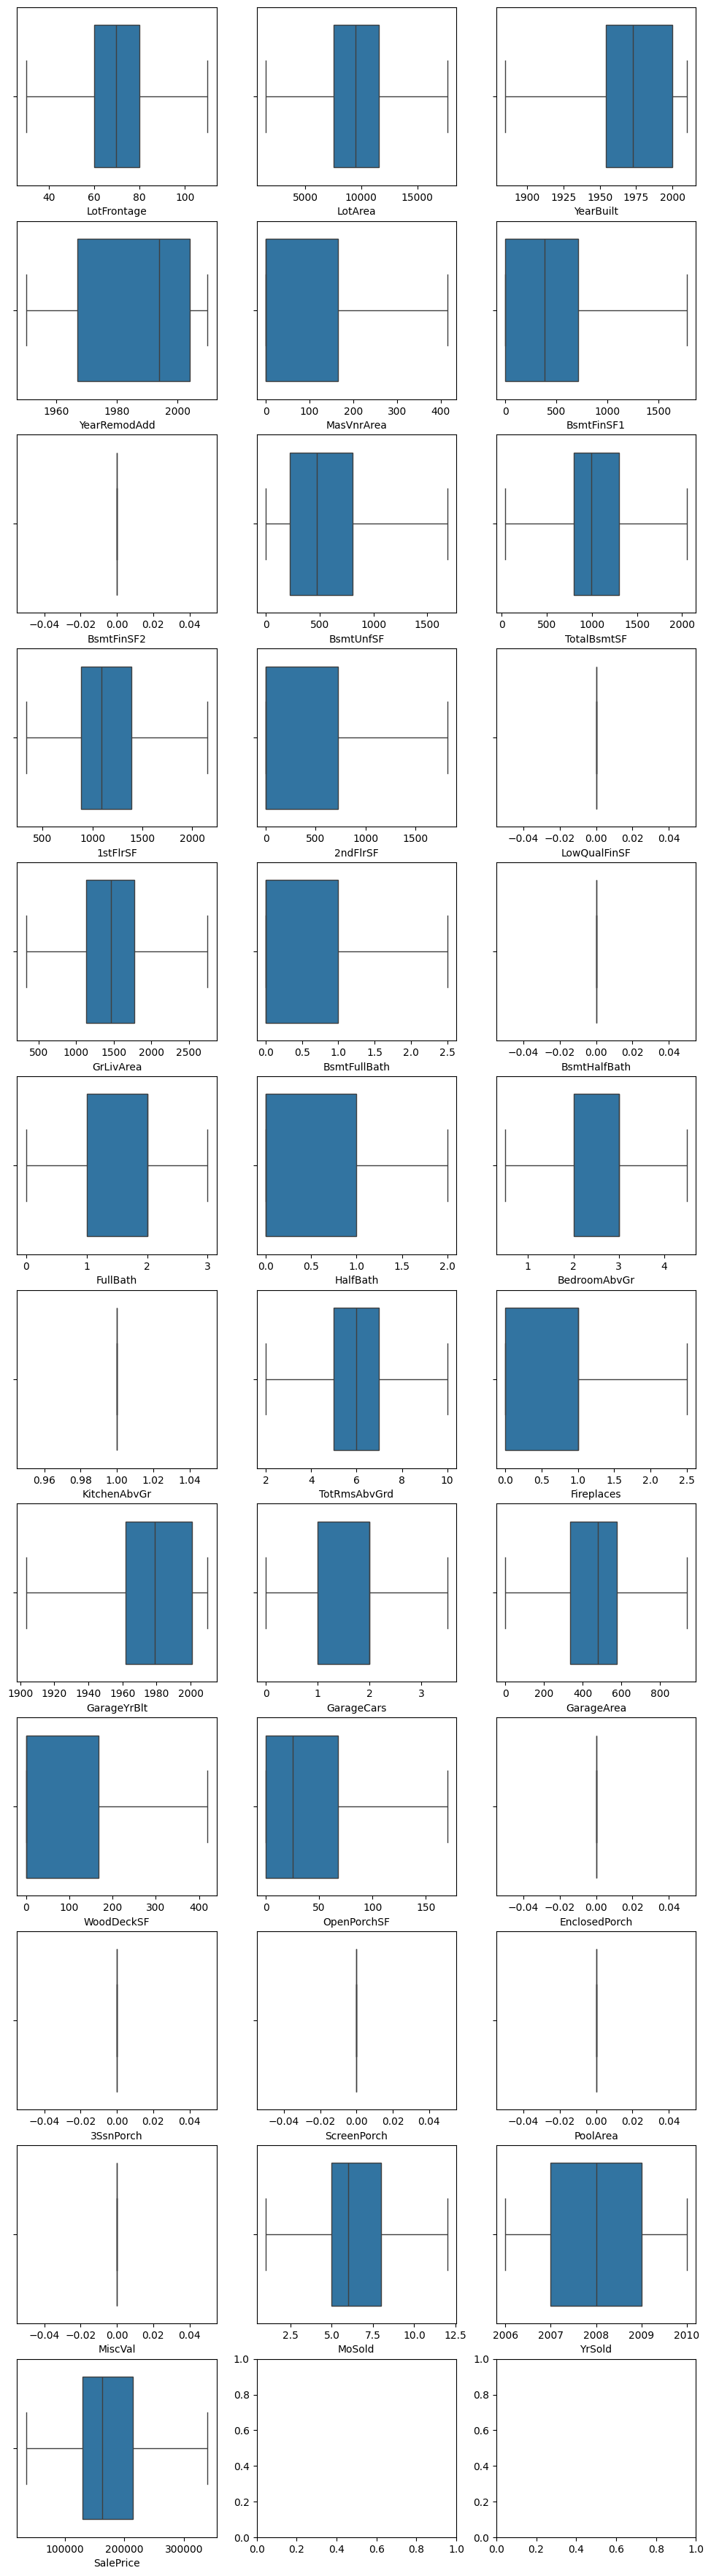

In [16]:
fig, axs = plt.subplots(12, 3, figsize = (12, 45))

for col, ax in zip(df_num.columns, axs.flatten()):
  sb.boxplot(data = df, x = col, ax = ax)

Dapat terlihat bahwa data outlier telah berhasil di-handle.

### Deteksi Imbalance Data

Proses terakhir dalam serangkaian proses Data Preprocessing adalah melakukan pengecekkan terhadap imbalance data. Data yang tidak seimbang (imbalance data) pada data target juga akan berpengaruh pada performa model (dalam konteks Machine Learning), mode akan menjadi bias dan cenderung memprediksi ke data dengan jumlah yang lebih banyak (dalam kasus Classification), maka dari itu perlu diperhatikan mengenai imbalance data ini. Pada dataset ini, data targetnya bertipe data numerik (berkorespondensi dengan Regression) yaitu kolom `SalePrice`, yang artinya dataset ini digunakan untuk kasus reggresion. Sehingga mengenai imbalance data tidak diperhatikan.

## Exploratory Data Analysis (EDA) dan Feature Enginering

Dalam proses ini, akan dilakukan beberapa hal, di antaranya adalah:
- Features Encoding
- Statistical Summaries
- Univariate Analysis
- Bivariate Analysis
- Features Selection
- Feature  Creation
- Features Scalling
- Preprocessor Pipeline

### Features Encoding

Untuk melakukan suatu task dalam Machine Learning, mesin hanya dapat memahami data dengan tipe data numerik. Maka dari itu, perlu dilakukan proses encoding (mengkonversi tipe data kategorik menjadi numerik).

Proses encoding data kategorik dapat dilakukan dengan bantuan module `Scikit-Learn` yang di dalamnya terdapat beberapa instance yang dapat digunakan untuk melakukan encoding, di antaranya adalah <b>Label Encoder</b> dan <b>One Hot Encoder</b>. Di sini akan dilakukan proses encoding menggunakan Label Encoder agar dimensi dari dataset tidak menjadi semakin besar, yang nantinya akan membuat proses training model (dalam konteks Machine Learning) menjadi lebih lama. Untuk melakukannya, dapat mengeksekusi perintah di bawah ini.

In [17]:
encoder = LabelEncoder()

df_num = df.select_dtypes(include = ['int64', 'float64']).drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond'])
df_cat = df.drop(columns = df_num.columns)

for col in df_cat.columns:
  df[col] = encoder.fit_transform(df[col])

Untuk memastikan apakah kolom bertipe data kategorik sudah di-encode, dapat dilakukan dengan menjalankan perintah `df[df_cat.columns].head()`.

In [18]:
df[df_cat.columns].head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,5,3,1,3,3,0,4,0,5,2,...,4,2,6,1,1,4,4,2,8,4
1,0,3,1,3,3,0,2,0,24,1,...,4,3,6,1,1,4,4,2,8,4
2,5,3,1,0,3,0,4,0,5,2,...,4,2,6,1,1,4,4,2,8,4
3,6,3,1,0,3,0,0,0,6,2,...,4,2,6,5,2,4,4,2,8,0
4,5,3,1,0,3,0,2,0,15,2,...,4,2,6,1,1,4,4,2,8,4


Dapat terlihat bahwa kolom dengan tipe data kategorik telah di-encode menjadi numerik. Sedikit catatan mengenai karakteristik dari proses encoding menggunakan Label Encoder:
- Data kategorik akan di-encode dalam bilangan bulat mulai dari 0 hingga (n-1) di mana n adalah banyaknya kategori.
- Bilangan bulat hasil proses encoding akan berkorespondensi dengan kategori yaang telah diurutkan berdasarkan abjad.

Berikut ini adalah ilustrasi tentang karakteristik encoding dengan Label Encoder:

|Sebelum Encoding|Setelah Encoding|
|---|---|
|Amerika|1|
|Afrika|0|
|Indonesia|3|
|Brasil|2|

Keterangan: Kategori jika diurutkan menurut abjad akan menjadi [Afrika, Amerika, Brasil, Indonesia], ini akan berkorespondensi dengan bilangan bulat [0, 1, 2, 3].



### Statistical Summaries

Statistical summaries berkaitan dengan statistika deskriptif, yang di dalamnya terdapat pengukuran tendensi sentral dari suatu data seperti mean, median, dan quartile serta pengukuran persebaran data seperti standart deviation.

Untuk melakukan statistical summaries, dapat menjalankan perintah `df.describe` seperti di bawah ini.

In [19]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,4.166438,3.028767,69.427454,9647.388014,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,7.513014,3.770548,177331.526370
std,4.161951,0.632017,18.708231,3594.356399,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,1.552100,1.100854,67205.835915
min,0.000000,0.000000,30.000000,1481.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,0.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,4.000000,3.000000,69.500000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,6.000000,3.000000,80.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,14.000000,4.000000,110.000000,17673.500000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,8.000000,5.000000,340037.500000


Di atas telah ditampilkan statistical summaries dari dataset yang digunakan. Didapatkan beberapa hal, yaitu:
- count, yaitu menampilkan jumlah dari data pada suatu kolom.
- mean, menampilkan nilai rata-rata dari data pada suatu kolom.
- std, menampilkan nilai standart deviation dari data pada suatu kolom.
- min, menampilkan data dengan nilai terkecil pada suatu kolom.
- 25%, menampilkan nilai kuartil ke-1 atau persentil ke-25 dari data pada suatu kolom.
- 50%, menampilkan nilai kuartil ke-2 atau persentil ke-50 dari data pada suatu kolom. Nilai ini juga merupakan nilai median.
- 75%, menampilkan nilai kuartil ke-3 atau persentil ke-75 dari data pada suatu kolom.
- max, menampilkan data dengan nilai terkecil pada suatu kolom.

<b>Perlu diperhatikan bahwa perintah `df.describe()`  sebenarnya hanya akan menampilkan statistical summaries dari kolom dengan tipe data numerik. Hanya saja pada proses sebelumnya telah dilakukan proses encoding pada data dengan tipe data kategorik menjadi numerik, sehingga juga ditampilkan statistical summaries dari kolom dengan tipe data kategorik.</b>

Dari statistical summaries ini dapat digunakan untuk menarik suatu insight. Misalnya pada kolom target pada dataset yang digunakan, yaitu kolom `SalePrice`, dapat diketahui beberapa hal yaitu:
- mean $\approx 180921$
- std $\approx 79443$

Dalam <b>Empirical Rule</b> dengan asumsi sample data yang digunakan besar (dalam hal ini, dataset yang digunakan telah memenuhi syarat tersebut) dikatakan bahwa "68% persebaran data terletak pada rentang (mean - std) hingga (mean + std)". Artinya dari kasus pada kolom `SalePrice`, 68% dari persebaran data harga rumah pada dataset tersebut terletak pada  rentang harga (180921 - 79443 = 101478) hingga (180921 + 79443 = 260364). Ini dapat digunakan dalam memperkirakan apakah budget yang dimiliki cukup untuk membeli rumah atau untuk pengambilan keputusan apakah ingin membeli rumah jika telah diketahui rentang harga rumahnya.


### Univariate Analysis

Dalam analisis ini, hanya dilihat variabel satu persatu tanpa menghubungkan
dengan variabel lainnya. Dari analisis ini akan diketahui frekuensi data, jenis distribusi data, posisi kuartil, data outlier dll.

Untuk melakukan univariate analysis dapat dengan cara sebegai berikut:
- Untuk data numerik, dapat dilakukan dengan mem-plot ke dalam boxplot.
- Untuk data numerik, dapat dilakukan dengan mem-plot ke dalam barplot

Pertama, akan dilakukan univariate analysis untuk data numerik. Caranya dapat mengeksekusi perintah berikut ini.

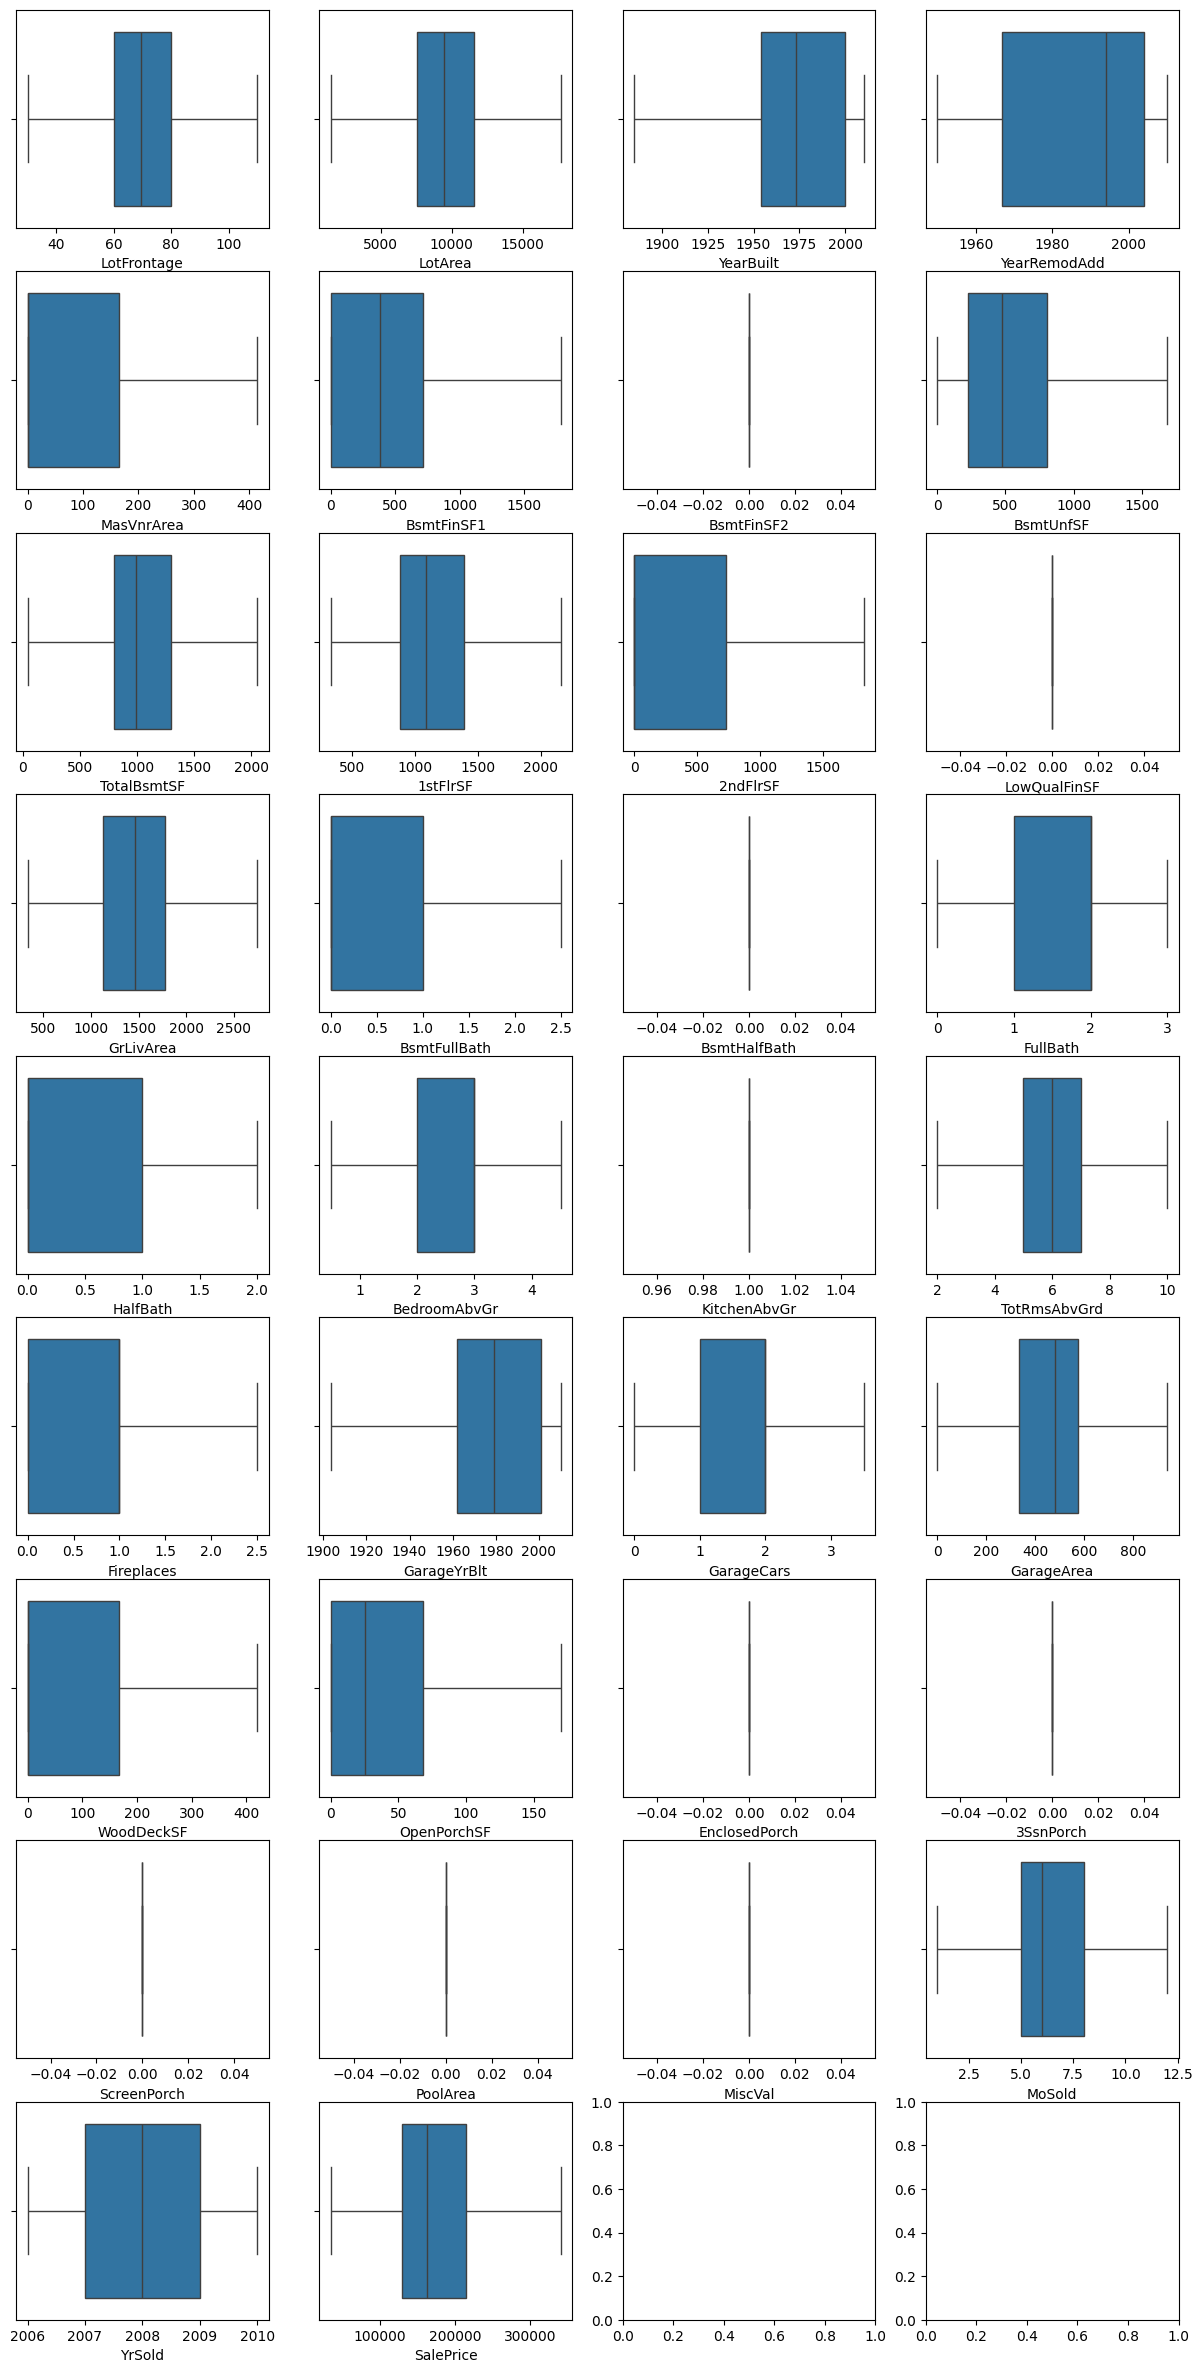

In [20]:
fig, axs = plt.subplots(9, 4, figsize = (15, 30))

for col, ax in zip(df_num.columns, axs.flatten()):
  sb.boxplot(data = df, x = col, ax = ax)

Dapat terlihat bahwa beberapa kolom memiliki distribusi data normal, namun ada juga yang berdistribusi left-skewed, right-skewed bahkan uniform.
- Ketika data berdistribusi normal, maka nilai mean = median = mode.
- Ketika data berdistribusi left-skewed, maka nilai mean < median < mode.
- Ketika data berdistribusi right-skewed, maka nilai mean > median > mode.
- Ketika data berdistribusi uniform, maka nilai mean = median dan data tidak memiliki mode.

Diketahui juga posisi kuartil data dari setiap kolom dan tidak terdapat data outlier karena sudah dilakukan handling pada proses sebelumnya.

Selanjutnya, akan dilakukan univariate analysis untuk data kategorik. Caranya dapat mengeksekusi perintah berikut ini.

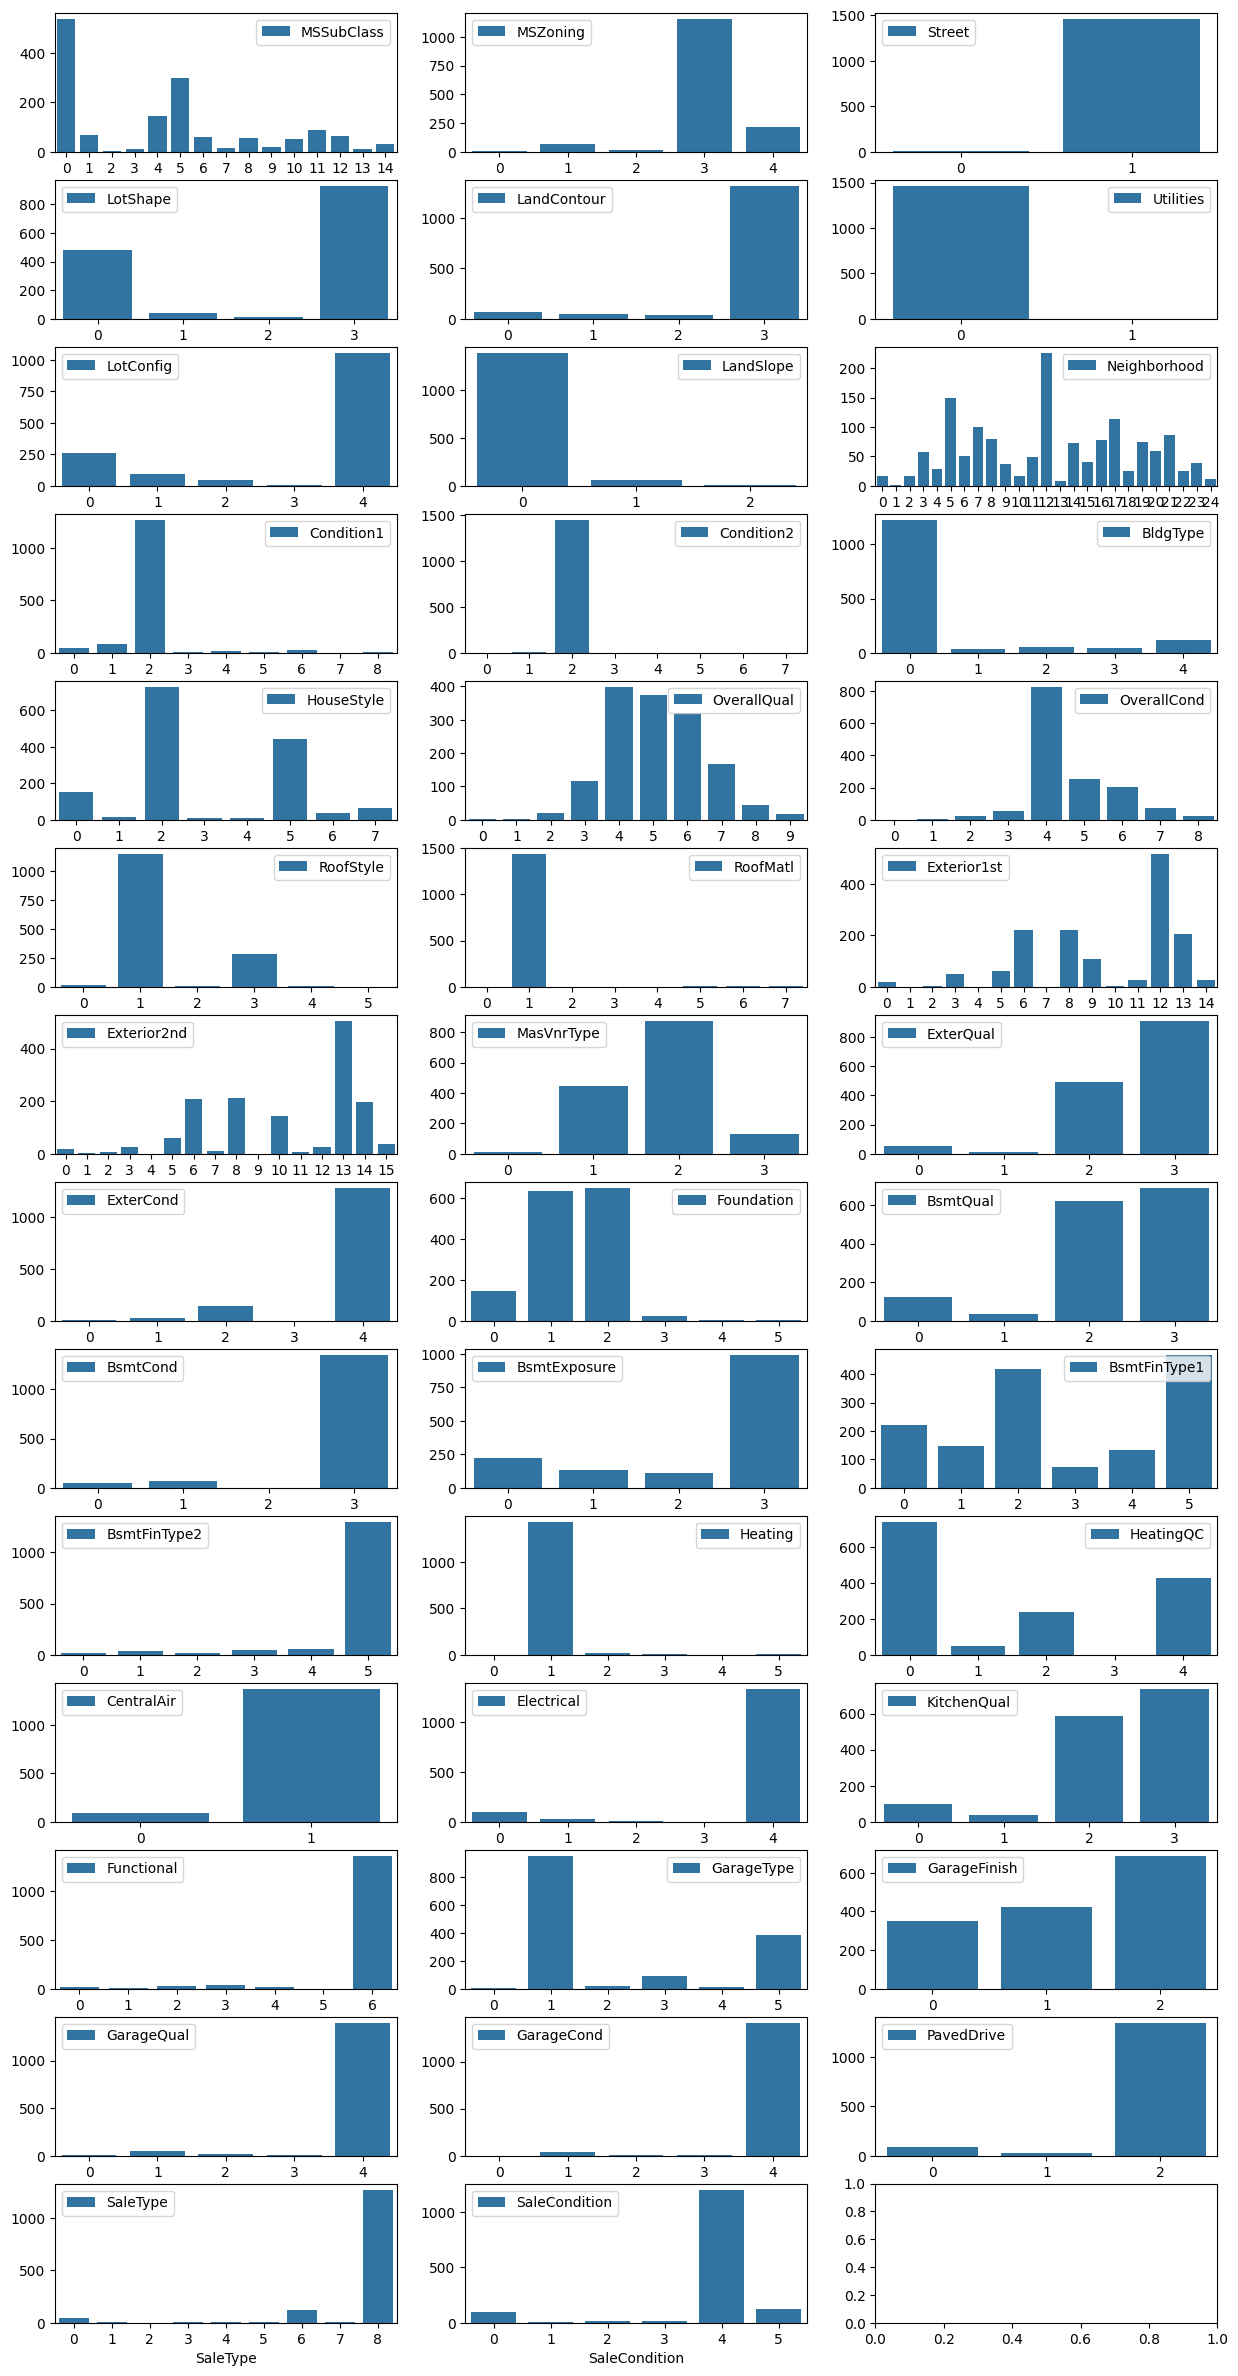

In [21]:
fig, axs = plt.subplots(14, 3, figsize = (15, 30))

for col, ax in zip(df_cat.columns, axs.flatten()):
  sb.countplot(x= col, data = df, ax = ax, label = col).set(ylabel = None)

Dapat dilihat bahwa frekuensi dari kategori pada setiap kolom berbeda-beda. Ada yang frekuensi kategorinya relatif merata dan ada kategori yang frekuensinya mendominasi.

### Bivariate Analysis

Pada analisis ini akan melibatkan dua atau lebih variabel dan mencoba melihat
hubungan yang ada antara hubungan data-data tersebut.

Untuk melakukan bivariate analysis dapat dengan menggunakan correlation coefficient antara satu kolom dengan kolom lain. Pada kasus ini, dataset yang digunakan adalah dataset yang memiliki data target yaitu kolom `SalePrice`. Akan dilihat correlation coefficient setiap kolom terhadap kolom target. Nilai correlation coefficient akan di-plot dalam bar plot. Untuk melakukannya dapat mengeksekusi perintah di bawah ini.

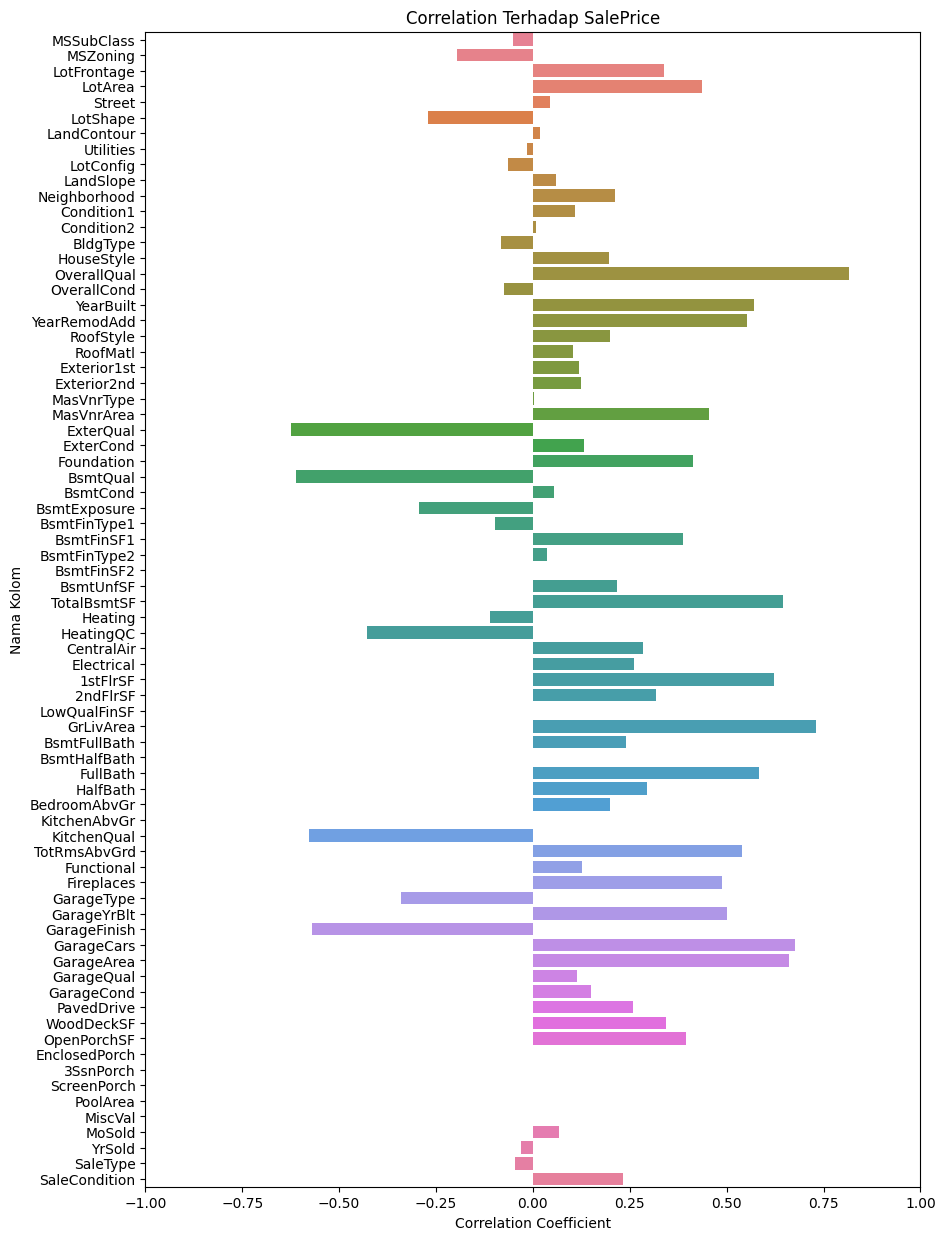

In [22]:
corr = df.corr()[df.corr().index == 'SalePrice'].drop(columns = 'SalePrice')
plt.figure(figsize = (10, 15))
plt.title('Correlation Terhadap SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Nama Kolom')
plt.xlim(-1, 1)
sb.barplot(data = corr, orient = 'h')
plt.show()

Dari hasil plot di atas, terlihat nilai correlation coefficient dari setiap kolom terhadap kolom target.
- Nilai correlation coefficient yang mengarah ke arah positif yang mengindikasikan korelasi positif antara suatu kolom dengan kolom target, artinya penambahan nilai pada suatu kolom akan menyebabkan penambahan nilai pula pada kolom target. Contohnya pada kolom `OverallQual`.
- Nilai correlation coefficient yang mengarah ke arah negatif yang mengindikasikan korelasi negatif antara suatu kolom dengan kolom target, penambahan nilai pada suatu kolom akan justru menyebabkan pengurangan nilai pada kolom target. Contohnya pada kolom `ExterQual`.
- Nilai correlation coefficient yang cenderung mengarah ke nilai 0 mengindikasikan tidak adanya korelasi antara suatu kolom dengan kolom target. Contohnya pada kolom `GarageQual`.

### Feature Selection

Feature Selection diperlukan untuk memilih data features mana saja yang paling relevan dari kumpulan data features asli dengan menghapus fitur yang redundan, tidak relevan, atau berisik. Memasukkan semua data features yang redundan dan tidak relevan bisa berdampak negatif seperti penurunan kinerja model (dalam konteks Machine Learning) secara keseluruhan. Oleh karena itu, sangat penting untuk mengidentifikasi dan memilih data features yang paling sesuai.

Salah satu indikator untuk menentukan seberapa relevan suatu data features adalah dengan menggunakan Correlation Coefficient yang telah sempat dibahas di atas. Untuk menampilkan kembali plotting correlation coefficient suatu data features terhadap data target, dapat mengeksekusi perintah berikut ini.

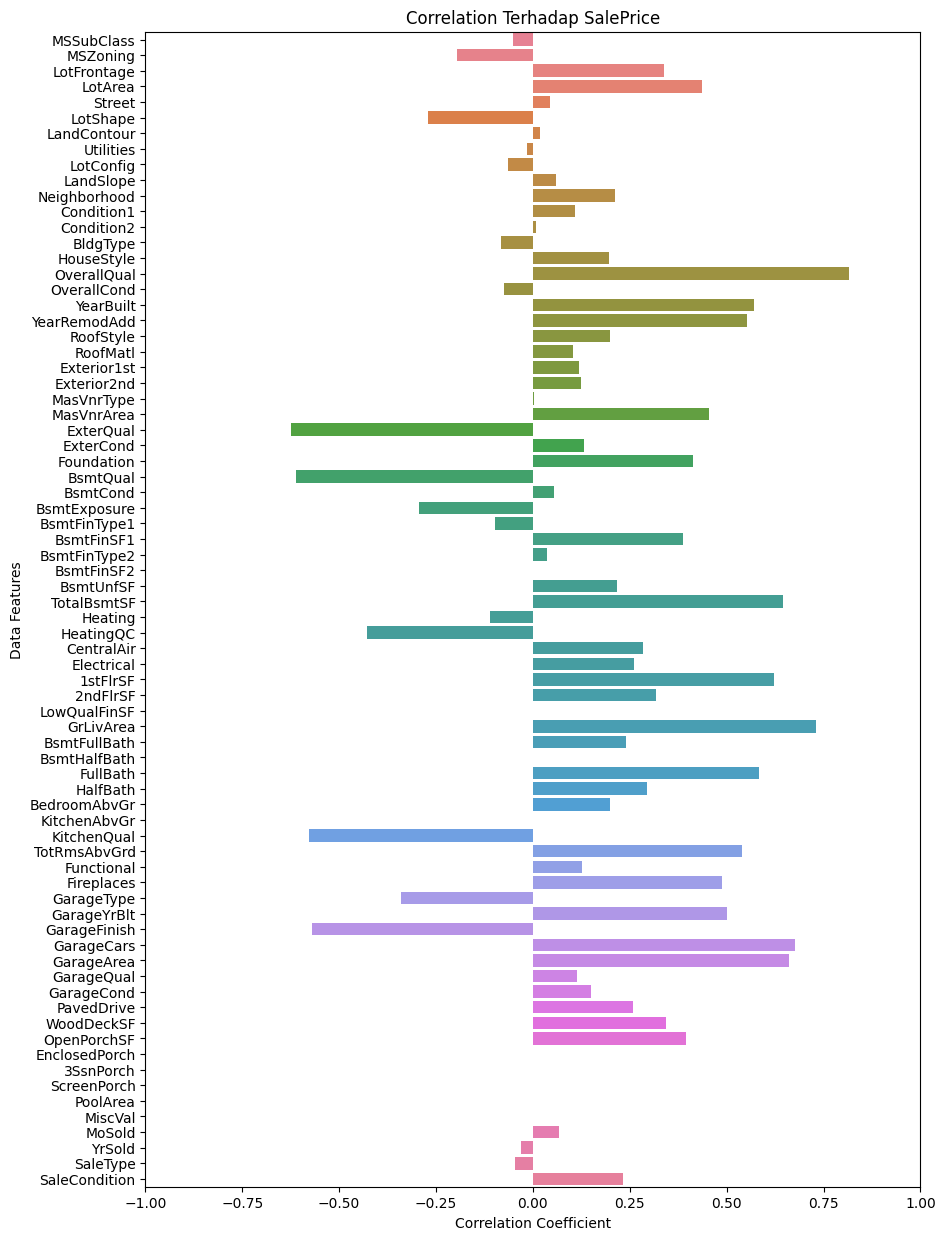

In [23]:
corr = df.corr()[df.corr().index == 'SalePrice'].drop(columns = 'SalePrice')
plt.figure(figsize = (10, 15))
plt.title('Correlation Terhadap SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Data Features')
plt.xlim(-1, 1)
sb.barplot(data = corr, orient = 'h')
plt.show()

Tidak ada aturan pasti tentang berapa nilai correlation coefficient dari suatu data features untuk dinyatakan bahwa data features tersebut relevan terhadap data target, hanya saja semakin besar nilainya, tingkat relevansinya juga semakin baik. Misalnya saja di sini ditentukan, nilai correlation coefficient yang harus dipenuhi suatu data features adalah minimal 0.3 (30%), baik itu korelasi positif maupun korelasi negatif. Data features yang tidak memenuhi syarat tersebut tidak akan dipilih menjadi data features untuk proses selanjutnya (atau sebagai data untuk Machine Learning). Hal ini dapat dilakukan dengan cara mengeksekusi perintah berikut ini.

In [24]:
for col in df.drop(columns = 'SalePrice').columns:
  if (corr[col][0] < 0.3 and corr[col][0] > -0.3):
    df.drop(columns = col, inplace = True)
  elif corr[col].isna()[0] == True :
    df.drop(columns = col, inplace = True)


Setelah proses seleksi dilakukan, untuk melihat berapa features yang masih bertahan, dapat mengeksekusi `df.shape[1]`.

In [25]:
df.shape[1]

27

In [26]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

Terlihat bahwa features yang memenuhi ambang batas yaitu 27. Features inilah yang akan digunakan pada proses selanjutnya.

### Features Creation

Kadangkala diperlukan suatu features baru yang diharapkan dapat meningkatkan performa model Machine Learning. Features baru ini dapat dibuat berdasarkan pengolahan atau transformasi dari features yang sudah ada.

Sebelum membuat features baru, jalankan `df.columns` untuk melihat features yang tersisa pada dataset setelah melalui beberapa proses di atas.

In [27]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

Terdapat feature `YearBuilt` yang merupakan tahun di mana suatu rumah dibangun. Disini akan dibuat feature baru untuk mengecek, apakah suatu rumah dibangun pada abad ke-21 (mulai tahun 2000 hingga sekarang).
- Nilai 0 berkorespondensi dengan nilai False.
- Nilai 1 berkorespondensi dengan nilai True.

Features ini akan diberi nama `IsBuiltIn21thCentury`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [28]:
IsBuiltIn21thCentury = [1 if val >= 2000 else 0 for val in df['YearBuilt']]

df.insert(df.shape[1] - 1, 'IsBuiltIn21thCentury', IsBuiltIn21thCentury)

Selanjutnya akan dibuat features untuk mengkategorikan luas teras berdasarkan kolom `OpenPorchSF` dengan ketentuan:
- Nilai 0 berkorespondensi dengan luas teras tidak lebih dari 100 square feet.
- Nilai 1 berkorespondensi dengan luas teras lebih dari 100 square feet.

Features ini akan diberi nama `PorchAreaCat`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [29]:
PorchAreaCat = [0 if val <= 100 else 1 for val in df['OpenPorchSF']]

df.insert(df.shape[1] - 1, 'PorchAreaCat', PorchAreaCat)

Selanjutnya akan dibuat features untuk mengkategorikan luas dek kayu berdasarkan kolom `WoodDeckSF` dengan ketentuan:
- Nilai 0 berkorespondensi dengan luas dek kayu tidak lebih dari 200 square feet.
- Nilai 1 berkorespondensi dengan luas dek kayu lebih dari 200 square feet.

Features ini akan diberi nama `WoodDeckAreaCat`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [30]:
WoodDeckAreaCat = [0 if val <= 200 else 1 for val in df['WoodDeckSF']]

df.insert(df.shape[1] - 1, 'WoodDeckAreaCat', WoodDeckAreaCat)

Selanjutnya akan dibuat features untuk mengkategorikan luas basement berdasarkan kolom `TotalBsmtSF` dengan ketentuan:
- Nilai 0 berkorespondensi dengan luas basement tidak lebih dari 1000 square feet.
- Nilai 1 berkorespondensi dengan luas basement lebih dari 1000 square feet.

Features ini akan diberi nama `TotalBsmtAreaCat`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [31]:
TotalBsmtAreaCat = [0 if val <= 1000 else 1 for val in df['TotalBsmtSF']]

df.insert(df.shape[1] - 1, 'TotalBsmtAreaCat', TotalBsmtAreaCat)

Selanjutnya akan dibuat features untuk mengkategorikan luas lantai pertama berdasarkan kolom `1stFlrSF` dengan ketentuan:
- Nilai 0 berkorespondensi dengan luas lantai pertama tidak lebih dari 1000 square feet.
- Nilai 1 berkorespondensi dengan luas lantai pertama lebih dari 1000 square feet.

Features ini akan diberi nama `1stFlrAreaCat`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [32]:
FirstFlrAreaCat = [0 if val <= 1000 else 1 for val in df['1stFlrSF']]

df.insert(df.shape[1] - 1, '1stFlrAreaCat', FirstFlrAreaCat)

Selanjutnya akan dibuat features untuk mengkategorikan luas lantai kedua berdasarkan kolom `2ndFlrSF` dengan ketentuan:
- Nilai 0 berkorespondensi dengan luas lantai kedua tidak lebih dari 1000 square feet.
- Nilai 1 berkorespondensi dengan luas lantai kedua lebih dari 1000 square feet.

Features ini akan diberi nama `2ndFlrAreaCat`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [33]:
SecondFlrAreaCat = [0 if val <= 1000 else 1 for val in df['2ndFlrSF']]

df.insert(df.shape[1] - 1, '2ndFlrAreaCat', SecondFlrAreaCat)

Selanjutnya akan dibuat features untuk mengkategorikan luas ground live berdasarkan kolom `GrLivArea` dengan ketentuan:
- Nilai 0 berkorespondensi dengan luas ground live tidak lebih dari 1000 square feet.
- Nilai 1 berkorespondensi dengan luas ground live lebih dari 1000 square feet.

Features ini akan diberi nama `GrLivAreaCat`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [34]:
GrLivAreaCat = [0 if val <= 1000 else 1 for val in df['GrLivArea']]

df.insert(df.shape[1] - 1, 'GrLivAreaCat', GrLivAreaCat)

Terakhir akan dibuat features untuk mengkategorikan luas garasi berdasarkan kolom `GarageArea` dengan ketentuan:
- Nilai 0 berkorespondensi dengan luas garasi tidak lebih dari 500 square feet.
- Nilai 1 berkorespondensi dengan luas garasi lebih dari 500 square feet.

Features ini akan diberi nama `GarageAreaCat`. Untuk melakukannya, dapat mengeksekusi perintah berikut ini.

In [35]:
GarageAreaCat = [0 if val <= 500 else 1 for val in df['GarageArea']]

df.insert(df.shape[1] - 1, 'GarageAreaCat', GarageAreaCat)

Untuk melihat features yang telah dibuat, dapat menjalankan perintah `df.head()`.

In [36]:
df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,...,OpenPorchSF,IsBuiltIn21thCentury,PorchAreaCat,WoodDeckAreaCat,TotalBsmtAreaCat,1stFlrAreaCat,2ndFlrAreaCat,GrLivAreaCat,GarageAreaCat,SalePrice
0,65.0,8450.0,6,2003,2003,196.0,2,2,2,706.0,...,61,1,0,0,0,0,0,1,1,208500.0
1,80.0,9600.0,5,1976,1976,0.0,3,1,2,978.0,...,0,0,0,1,1,1,0,1,0,181500.0
2,68.0,11250.0,6,2001,2002,162.0,2,2,2,486.0,...,42,1,0,0,0,0,0,1,1,223500.0
3,60.0,9550.0,6,1915,1970,0.0,3,0,3,216.0,...,35,0,0,0,0,0,0,1,1,140000.0
4,84.0,14260.0,7,2000,2000,350.0,2,2,2,655.0,...,84,1,0,0,1,1,1,1,1,250000.0


### Features Scalling

Beberapa model Machine Learning sangat sensitif terhadap jarak. Apabila beberapa features memiliki orde yang berbeda signifikan, misalnya suatu feature memiliki orde satuan, sedangkan features lain memiliki orde ribuan, ini akan membuat performa model menjadi bias. Perbedaan orde ini dapat di-handle dengan menerapkan proses scalling. Proses scalling hanya untuk features dengan tipe data numerik.

Salah satu teknik scalling yang dapat digunakan adalah `Min Max Scaler`.
Teknik ini bekerja dengan cara memampatkan suatu persebaran data berdasarkan nilai minimum dan maksimumnya menjadi suatu rentang tertentu. Pada umumnya, Min Max Scaler akan memampatkan jangkauan data dari nilai 0 hingga 1. Untuk melakukan teknik ini, dapat mengeksekusi perintah berikut.

In [37]:
df_num = df[df.columns].select_dtypes(include = ['int64', 'float64']).drop(columns = ['OverallQual', 'IsBuiltIn21thCentury', 'PorchAreaCat', 'WoodDeckAreaCat', 'TotalBsmtAreaCat', '1stFlrAreaCat', '2ndFlrAreaCat', 'GrLivAreaCat', 'GarageAreaCat'])
df_cat = df[df.columns].drop(columns = df_num.columns)

scaler = MinMaxScaler()

for col in df_num.columns:
  df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1,1))


Setelah itu, jalankan `df.head()` untuk melihat perubahan.

In [38]:
df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,...,OpenPorchSF,IsBuiltIn21thCentury,PorchAreaCat,WoodDeckAreaCat,TotalBsmtAreaCat,1stFlrAreaCat,2ndFlrAreaCat,GrLivAreaCat,GarageAreaCat,SalePrice
0,0.4375,0.430367,6,0.944,0.883333,0.472289,0.666667,0.4,0.666667,0.396490,...,0.358824,1,0,0,0,0,0,1,1,0.568924
1,0.6250,0.501390,5,0.728,0.433333,0.000000,1.000000,0.2,0.666667,0.549245,...,0.000000,0,0,1,1,1,0,1,0,0.480439
2,0.4750,0.603292,6,0.928,0.866667,0.390361,0.666667,0.4,0.666667,0.272938,...,0.247059,1,0,0,0,0,0,1,1,0.618082
3,0.3750,0.498302,6,0.240,0.333333,0.000000,1.000000,0.0,1.000000,0.121306,...,0.205882,0,0,0,0,0,0,1,1,0.344435
4,0.6750,0.789186,7,0.920,0.833333,0.843373,0.666667,0.4,0.666667,0.367848,...,0.494118,1,0,0,1,1,1,1,1,0.704928


Terlihat bahwa data numerik telah di-scalling menjadi rentang 0 - 1.

### Preprocessor Pipeline

Di atas telah dilakukan proses pengolahan data seperti handling missing values, handling outlier, features encoding, features selection, dan features scalling. Dalam Machine Learning, proses pengolahan data tersebut tidak hanya diterapkan untuk training data, namun juga akan diterapkan pada testing data. Oleh karena itu dibutuhkan suatu function yang akan secara otomatis melakukan beberapa proses di atas sehingga tidak perlu melakukan proses tersebut secara manual.

Untuk dataset Housing Price, berikut ini adalah preprocessor pipeline yang dapat digunakan.

In [39]:
def preprocessor_pipeline(df):

  # drop column 'Id'
  df.drop(columns = 'Id', inplace = True)

  # drop column with missing value > 20& total entry data
  for col in df.columns:
    if df[col].isna().sum() >= 0.2 * df.shape[0]:
      df.drop(columns = col, inplace = True)

  # imputatation missing values
  df_num = df.select_dtypes(include = ['int64', 'float64']).drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond'])
  df_cat = df.drop(columns = df_num.columns)
  for col in df_cat.columns:
    df[col].fillna(df[col].mode()[0], inplace = True)
  for col in df_num.columns:
    df[col].fillna(df[col].interpolate(), inplace = True)

  # handling outlier
  df_num = df.select_dtypes(include = ['int64', 'float64']).drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond'])
  df_cat = df.drop(columns = df_num.columns)
  for col in df_num.columns:
    q1    = np.quantile(df[col], q = 0.25)
    q3    = np.quantile(df[col], q = 0.75)
    iqr   = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    for i in range(len(df)):
      if df[col][i] < lower:
        df[col][i] = lower
      elif df[col][i] > upper:
        df[col][i] = upper

  # features encoding
  encoder = LabelEncoder()
  df_num = df.select_dtypes(include = ['int64', 'float64']).drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond'])
  df_cat = df.drop(columns = df_num.columns)
  for col in df_cat.columns:
    df[col] = encoder.fit_transform(df[col])

  # features selection
  corr = df.corr()[df.corr().index == 'SalePrice'].drop(columns = 'SalePrice')
  for col in df.drop(columns = 'SalePrice').columns:
    if (corr[col][0] < 0.3 and corr[col][0] > -0.3):
      df.drop(columns = col, inplace = True)
    elif corr[col].isna()[0] == True :
      df.drop(columns = col, inplace = True)

  # features scalling
  df_num = df[df.columns].select_dtypes(include = ['int64', 'float64']).drop(columns = ['OverallQual'])
  df_cat = df[df.columns].drop(columns = df_num.columns)
  scaler = MinMaxScaler()
  for col in df_num.columns:
    df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1,1))

  # hasil pipeline
  return df

Untuk menggunakan pipeline di atas, cukup memasukan dataset sebagai parameter. Sebagai contoh, berikut ini adalah dataset yang belum diolah.

In [40]:
df_before = df_backup.copy(deep = True)
df_before.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Setelah diolah menggunakan pipeline di atas, maka dataset akan menjadi seperti di bawah ini.

In [41]:
df_after = preprocessor_pipeline(df_before)
df_after

<ipython-input-39-3c5d2e1f7dab>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper
<ipython-input-39-3c5d2e1f7dab>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,0.4375,0.430367,6,0.944,0.883333,0.472289,0.666667,0.4,0.666667,0.396490,...,0.750,0.0,0.2,0.934272,0.5,0.571429,0.584066,0.000000,0.358824,0.568924
1,0.6250,0.501390,5,0.728,0.433333,0.000000,1.000000,0.2,0.666667,0.549245,...,0.500,0.4,0.2,0.680751,0.5,0.571429,0.490274,0.709524,0.000000,0.480439
2,0.4750,0.603292,6,0.928,0.866667,0.390361,0.666667,0.4,0.666667,0.272938,...,0.500,0.4,0.2,0.915493,0.5,0.571429,0.648015,0.000000,0.247059,0.618082
3,0.3750,0.498302,6,0.240,0.333333,0.000000,1.000000,0.0,1.000000,0.121306,...,0.625,0.4,1.0,0.887324,1.0,0.857143,0.684253,0.000000,0.205882,0.344435
4,0.6750,0.789186,7,0.920,0.833333,0.843373,0.666667,0.4,0.666667,0.367848,...,0.875,0.4,0.2,0.906103,0.5,0.857143,0.891021,0.457143,0.494118,0.704928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.4000,0.397449,5,0.912,0.833333,0.000000,1.000000,0.4,0.666667,0.000000,...,0.625,0.4,0.2,0.896714,0.5,0.571429,0.490274,0.000000,0.235294,0.459137
1456,0.6875,0.722178,5,0.744,0.633333,0.286747,1.000000,0.2,0.666667,0.443664,...,0.625,0.8,0.2,0.699531,1.0,0.571429,0.532907,0.830952,0.000000,0.573840
1457,0.4500,0.466928,6,0.448,0.933333,0.000000,0.000000,0.8,1.000000,0.154440,...,0.875,0.8,0.2,0.352113,0.5,0.285714,0.268585,0.000000,0.352941,0.759002
1458,0.4750,0.508615,4,0.520,0.766667,0.000000,1.000000,0.2,1.000000,0.027518,...,0.375,0.0,0.2,0.436620,1.0,0.285714,0.255795,0.871429,0.000000,0.351399
